In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
coordinates

[(-81.34283778880572, -37.48144752448732),
 (23.9520168269202, 151.95878621180708),
 (-14.805316751601339, -1.4188185335902972),
 (60.31622102458908, -130.8907418729176),
 (77.20348450921486, 163.61724190917033),
 (50.350970011441575, 71.88654398473662),
 (88.89465475044801, -65.36677114097556),
 (-85.77746309331643, 151.22406942053755),
 (-22.146044050816073, -52.38018209027557),
 (27.820178238417242, 56.23355544723222),
 (29.764100147515848, 174.97725887045863),
 (-29.31314083911638, 126.07191292883061),
 (-85.17312756838132, -156.73152650091595),
 (3.7301611737795213, 52.6323568252906),
 (-61.82544871117051, 50.65852946871104),
 (5.831955545239538, -132.0592323947387),
 (21.715980023144766, 7.4427093145240235),
 (1.197850392005904, -126.77272084728608),
 (2.010716591588505, 89.3431433755826),
 (62.525127544935486, 96.92181743691111),
 (21.76383364783088, 55.03904661388097),
 (9.289953412004664, 176.71299214905918),
 (76.36456494813575, 1.5037580295302746),
 (2.7125549890456995, -112

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=''


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | katsuura
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | juneau
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | osakarovka
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | teodoro sampaio
Processing Record 10 of Set 1 | qeshm
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | hobyo
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | arlit
Processing Record 18 of Set 1 | banda aceh
Processing Record 19 of Set 1 | baykit
Processing Record 20 of Set 1 | nizwa
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 22 of Set 1 | san patricio
Processing Record 

Processing Record 40 of Set 4 | gamba
Processing Record 41 of Set 4 | amderma
City not found. Skipping...
Processing Record 42 of Set 4 | zivinice
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | saint-augustin
Processing Record 45 of Set 4 | maltahohe
Processing Record 46 of Set 4 | three hills
Processing Record 47 of Set 4 | arak
Processing Record 48 of Set 4 | atambua
Processing Record 49 of Set 4 | zhuhai
Processing Record 50 of Set 4 | nabire
Processing Record 1 of Set 5 | kathmandu
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | molo
Processing Record 5 of Set 5 | cayenne
Processing Record 6 of Set 5 | poyarkovo
Processing Record 7 of Set 5 | burica
City not found. Skipping...
Processing Record 8 of Set 5 | port augusta
Processing Record 9 of Set 5 | isangel
Processing Record 10 of Set 5 | kaniama
Processing Record 11 of Set 5 | juruti
Processing Record 12 of Set 5 | ostrovnoy
Processing Rec

Processing Record 31 of Set 8 | falmouth
Processing Record 32 of Set 8 | lavrentiya
Processing Record 33 of Set 8 | traverse city
Processing Record 34 of Set 8 | araouane
Processing Record 35 of Set 8 | adolfo lopez mateos
Processing Record 36 of Set 8 | los llanos de aridane
Processing Record 37 of Set 8 | beyneu
Processing Record 38 of Set 8 | ahipara
Processing Record 39 of Set 8 | menongue
Processing Record 40 of Set 8 | coahuayana
Processing Record 41 of Set 8 | artyk
City not found. Skipping...
Processing Record 42 of Set 8 | dzaoudzi
Processing Record 43 of Set 8 | prince rupert
Processing Record 44 of Set 8 | gat
Processing Record 45 of Set 8 | novikovo
Processing Record 46 of Set 8 | norman wells
Processing Record 47 of Set 8 | cascais
Processing Record 48 of Set 8 | saleaula
City not found. Skipping...
Processing Record 49 of Set 8 | saint pete beach
Processing Record 50 of Set 8 | fortuna
Processing Record 1 of Set 9 | cabra
Processing Record 2 of Set 9 | pevek
Processing Re

Processing Record 19 of Set 12 | iranshahr
Processing Record 20 of Set 12 | celestun
Processing Record 21 of Set 12 | faanui
Processing Record 22 of Set 12 | ariquemes
Processing Record 23 of Set 12 | samarai
Processing Record 24 of Set 12 | itoman
Processing Record 25 of Set 12 | muli
Processing Record 26 of Set 12 | houston
Processing Record 27 of Set 12 | praia
Processing Record 28 of Set 12 | kaeo
Processing Record 29 of Set 12 | leshukonskoye
Processing Record 30 of Set 12 | peniche
Processing Record 31 of Set 12 | opuwo
Processing Record 32 of Set 12 | matiguas
Processing Record 33 of Set 12 | traralgon
Processing Record 34 of Set 12 | vacaria
Processing Record 35 of Set 12 | narrabri
Processing Record 36 of Set 12 | port blair
Processing Record 37 of Set 12 | yelan-kolenovskiy
Processing Record 38 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 39 of Set 12 | chapleau
Processing Record 40 of Set 12 | bonavista
Processing Record 41 of Set 12 | nuevo progreso

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,35.60,69,40,5.82,AR,2020-07-10 21:46:24
1,Katsuura,35.13,140.30,81.00,93,100,5.99,JP,2020-07-10 21:44:22
2,Jamestown,42.10,-79.24,87.80,43,20,9.17,US,2020-07-10 21:46:24
3,Juneau,58.30,-134.42,60.80,67,90,9.17,US,2020-07-10 21:46:24
4,Cherskiy,68.75,161.30,56.68,74,86,9.28,RU,2020-07-10 21:42:30
5,Osakarovka,50.56,72.57,57.54,82,0,6.31,KZ,2020-07-10 21:46:24
6,Qaanaaq,77.48,-69.36,45.18,59,59,2.64,GL,2020-07-10 21:44:15
7,Bluff,-46.60,168.33,48.81,76,89,20.96,NZ,2020-07-10 21:46:02
8,Teodoro Sampaio,-22.53,-52.17,64.96,76,69,6.49,BR,2020-07-10 21:46:25
9,Qeshm,26.96,56.27,91.40,75,20,4.70,IR,2020-07-10 21:46:25


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
City_list = city_data_df[new_column_order]
City_list.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-07-10 21:46:24,-54.80,-68.30,35.60,69,40,5.82
1,Katsuura,JP,2020-07-10 21:44:22,35.13,140.30,81.00,93,100,5.99
2,Jamestown,US,2020-07-10 21:46:24,42.10,-79.24,87.80,43,20,9.17
3,Juneau,US,2020-07-10 21:46:24,58.30,-134.42,60.80,67,90,9.17
4,Cherskiy,RU,2020-07-10 21:42:30,68.75,161.30,56.68,74,86,9.28


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/10/20'

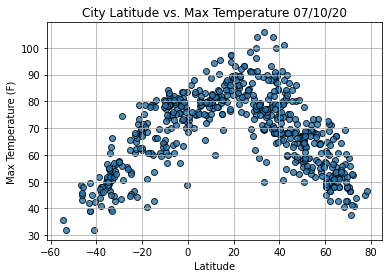

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

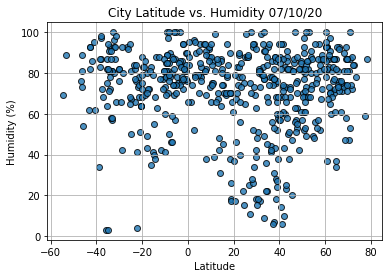

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

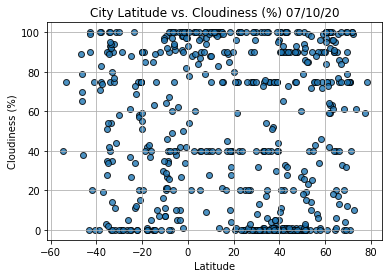

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

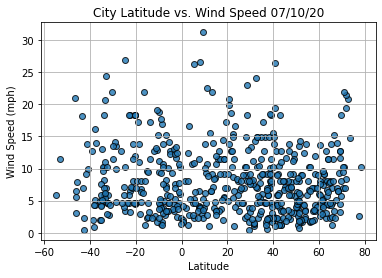

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()